In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("IPL_Auction_2022_vdata.csv")
df

,Set No.,Set Name,Player,Country,State Association,Age,Specialism,Batting,Bowling,IPL,Previous IPLTeam(s),2021 Team,C/U/A,Base Price(CR),Sold Price(CR),New Franchise,Bid
0,1,M,Trent Boult,New Zealand,0,32,BOWLER,RHB,LEFT ARM Fast Medium,62.0,"SRH, KKR, DD,MI",MI,Capped,2.0,8.00,Rajasthan Royals,Sold
1,1,M,Pat Cummins,Australia,0,28,ALL-ROUNDER,RHB,RIGHT ARM Fast,37.0,"DD, MI, KKR",KKR,Capped,2.0,7.25,Kolkata Knight Riders,Sold
2,1,M,Shikhar Dhawan,India,DDCA,36,BATSMAN,LHB,-,192.0,"DCH, MI, SRH, DC",DC,Capped,2.0,8.25,Punjab Kings,Sold
3,1,M,Shreyas Iyer,India,MCA,27,BATSMAN,RHB,RIGHT ARM Leg Spin,87.0,DC,DC,Capped,2.0,12.25,Kolkata Knight Riders,Sold
4,1,M,Kagiso Rabada,South Africa,0,26,BOWLER,LHB,RIGHT ARM Fast,0.5,DC,DC,Capped,2.0,9.25,Punjab Kings,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,62,UAL15,Safyaan Sharif,Scotland,0,30,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,0,0,Associate,0.2,0.00,0,UnSold
585,62,UAL15,Henry Shipley,New Zealand,0,25,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,0,0,Uncapped,0.2,0.00,0,UnSold
586,62,UAL15,Maxwell Swaminathan,India,MCA,23,ALL-ROUNDER,RHB,RIGHT ARM Off Spin,0.0,0,0,Uncapped,0.2,0.00,0,UnSold
587,62,UAL15,Johan Van Dyk,South Africa,0,28,ALL-ROUNDER,RHB,RIGHT ARM Fast Medium,0.0,0,0,Uncapped,0.2,0.00,0,UnSold


In [3]:
df.fillna(df,inplace=True)

In [4]:
df.drop(['Set No.','Set Name','Age','State Association','Previous IPLTeam(s)','C/U/A','Batting','Bowling','2021 Team','New Franchise'], axis=1 , inplace=True)
df

,Player,Country,Specialism,IPL,Base Price(CR),Sold Price(CR),Bid
0,Trent Boult,New Zealand,BOWLER,62.0,2.0,8.00,Sold
1,Pat Cummins,Australia,ALL-ROUNDER,37.0,2.0,7.25,Sold
2,Shikhar Dhawan,India,BATSMAN,192.0,2.0,8.25,Sold
3,Shreyas Iyer,India,BATSMAN,87.0,2.0,12.25,Sold
4,Kagiso Rabada,South Africa,BOWLER,0.5,2.0,9.25,Sold
...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,ALL-ROUNDER,0.0,0.2,0.00,UnSold
585,Henry Shipley,New Zealand,ALL-ROUNDER,0.0,0.2,0.00,UnSold
586,Maxwell Swaminathan,India,ALL-ROUNDER,0.0,0.2,0.00,UnSold
587,Johan Van Dyk,South Africa,ALL-ROUNDER,0.0,0.2,0.00,UnSold


In [5]:
def Specialism(x):
    if x == "BOWLER":
      return 0
    if x == "BATSMAN":
      return 1
    if x == "ALL-ROUNDER":
      return 2

In [6]:
df['Specialism']= df['Specialism'].apply(Specialism)

In [7]:
def Bid(x):
    if x == "Sold":
      return 1
    if x == "UnSold":
      return 0

In [8]:
df['Bid']=df['Bid'].apply(Bid)

In [9]:
print(df.keys())
df.isnull().sum()

Index(['Player', 'Country', 'Specialism', 'IPL', 'Base Price(CR)',
       'Sold Price(CR)', 'Bid'],
      dtype='object')


Player             0
Country            0
Specialism        58
IPL                0
Base Price(CR)     0
Sold Price(CR)     0
Bid                0
dtype: int64

In [10]:
df

,Player,Country,Specialism,IPL,Base Price(CR),Sold Price(CR),Bid
0,Trent Boult,New Zealand,0.0,62.0,2.0,8.00,1
1,Pat Cummins,Australia,2.0,37.0,2.0,7.25,1
2,Shikhar Dhawan,India,1.0,192.0,2.0,8.25,1
3,Shreyas Iyer,India,1.0,87.0,2.0,12.25,1
4,Kagiso Rabada,South Africa,0.0,0.5,2.0,9.25,1
...,...,...,...,...,...,...,...
584,Safyaan Sharif,Scotland,2.0,0.0,0.2,0.00,0
585,Henry Shipley,New Zealand,2.0,0.0,0.2,0.00,0
586,Maxwell Swaminathan,India,2.0,0.0,0.2,0.00,0
587,Johan Van Dyk,South Africa,2.0,0.0,0.2,0.00,0


# Total Number of Players in an Each Country 

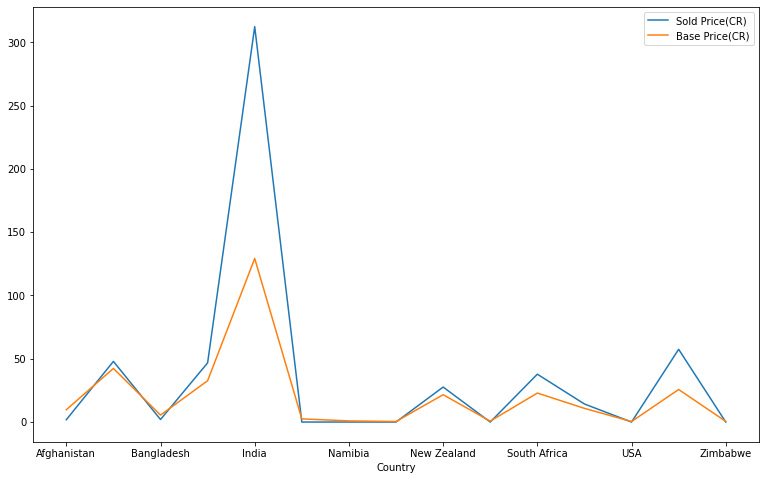

In [11]:
df[['Country','Sold Price(CR)','Base Price(CR)']].groupby("Country").sum().plot(figsize=(13,8));
plt.show()

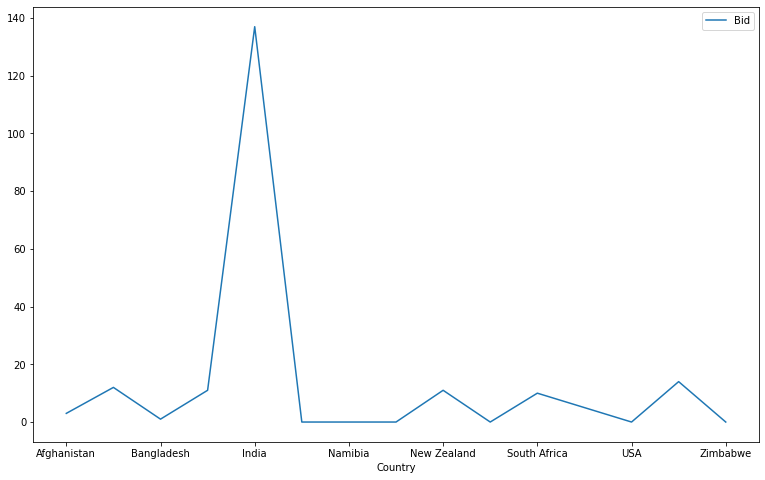

In [12]:
df[['Country','Bid']].groupby("Country").sum().plot(figsize=(13,8));
plt.show()

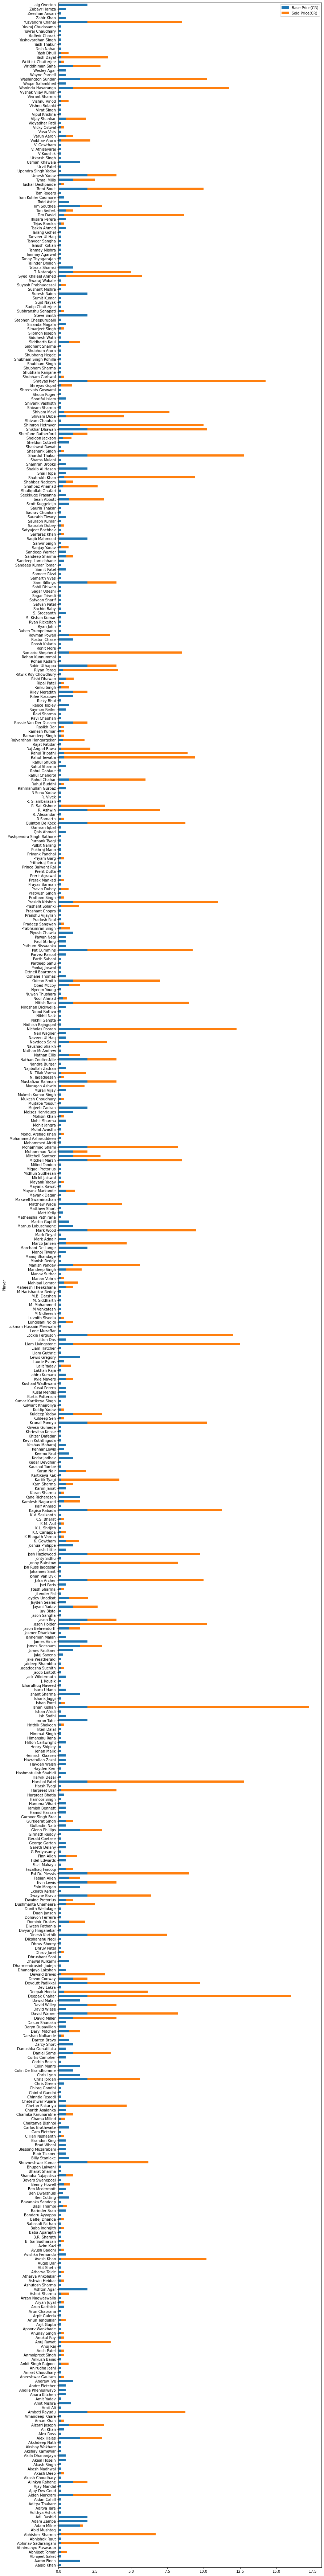

In [13]:
df[['Player','Base Price(CR)','Sold Price(CR)']].groupby("Player").mean().plot.barh(stacked=True,figsize=(13,130));
plt.show()

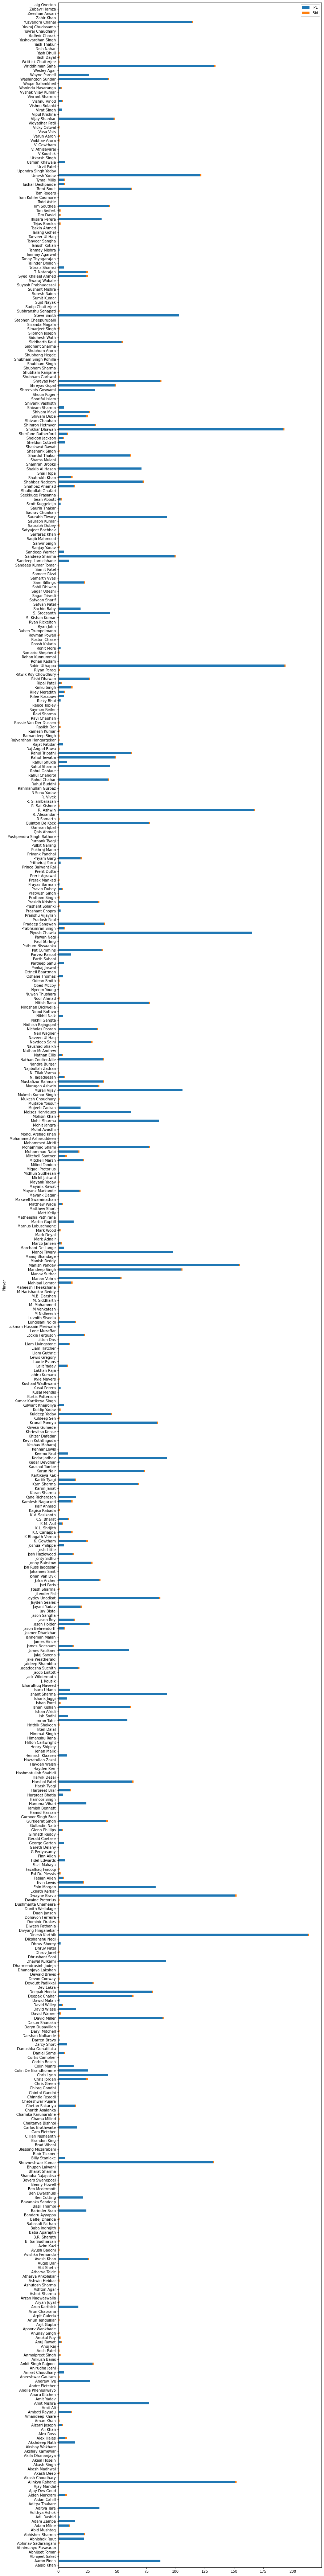

In [14]:
df[['Player','IPL','Bid']].groupby("Player").mean().plot.barh(stacked=True,figsize=(13,130));
plt.show()

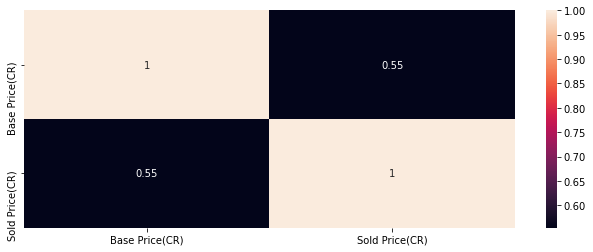

In [15]:
plt.figure(figsize=(11,4))
sns.heatmap(df[['Base Price(CR)','Sold Price(CR)']].corr(),annot=True)
plt.show()

C:\Users\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


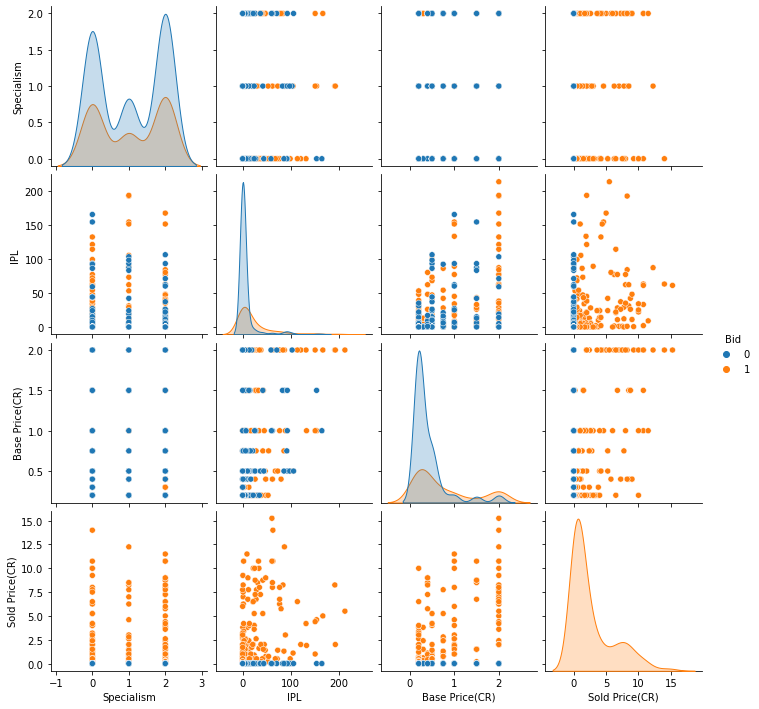

In [16]:
sns.pairplot(df ,hue='Bid')

In [17]:
df.drop(['Player','Country','Specialism','Bid'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IPL             589 non-null    float64
 1   Base Price(CR)  589 non-null    float64
 2   Sold Price(CR)  589 non-null    float64
dtypes: float64(3)
memory usage: 13.9 KB


In [18]:
df

,IPL,Base Price(CR),Sold Price(CR)
0,62.0,2.0,8.00
1,37.0,2.0,7.25
2,192.0,2.0,8.25
3,87.0,2.0,12.25
4,0.5,2.0,9.25
...,...,...,...
584,0.0,0.2,0.00
585,0.0,0.2,0.00
586,0.0,0.2,0.00
587,0.0,0.2,0.00


In [19]:
df.describe()

,IPL,Base Price(CR),Sold Price(CR)
count,589.000000,589.000000,589.000000
mean,11.988455,0.519270,0.930374
std,29.965403,0.534672,2.338774
min,0.000000,0.200000,0.000000
25%,0.000000,0.200000,0.000000
50%,0.000000,0.200000,0.000000
75%,5.000000,0.500000,0.300000
max,213.000000,2.000000,15.250000


In [20]:
x = (df - np.min(df)) / (np.max(df) - np.min(df))
x.head()

,IPL,Base Price(CR),Sold Price(CR)
0,0.291080,1.0,0.524590
1,0.173709,1.0,0.475410
2,0.901408,1.0,0.540984
3,0.408451,1.0,0.803279
4,0.002347,1.0,0.606557


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x[['Sold Price(CR)']],x["IPL"],test_size=0.2,random_state=105)

In [44]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 0 61 10 10 15  0 15  0  0 26  0 73  0  0  0 14  0  6 10 16 49 42  0  0
 18 31  0 34  0 13  0 62 75  0 27  0  0  0  0  9  0  0 47  0  0  9  0 29
  8 51 18  0 12  0  0  8 32  0  0  0  0  0  0  0  0 51  0  6 72 68  0  6
  0 30  0  0 34  0  0  0  0  0  0  0 29  0  8  0  6  0 46  0  6  2  0  0
 37  0 40  0  0  0 55 21  0  0 11  0 30 57  0  0  0 11  0  6  0  0  0  0
  0  0 31 18 66  0  0  0 41  0 18 43 54  9  0 45  0  9  0  0 28  0  3  0
  0 26 56  0  0 27  0 29  0  0 43  0  6  0 11  0 48  0  6 22  0  0 13  6
  0  0  0  0  0  0  1  0 11  0  0 11  0 53  0 75 50  0  0  0  6  0  0  0
  0 59  0 11  0 44  0 24  0  0 38  0  0  0 33  0  0 21  0  8  0 28  0  0
  0 10 64  0 24 11  0  0 21  0  0 15 12  0  0  0  0 77 29  0 57  6  0  0
  0  0  0  3  0  0  0  6  0  0  0  0 13  0 65  6 11 74  0  0 29 67  0  0
 25  0 18 11  9  0  0  0  0  8  0 12 63  0  8  0  0 21 69 61 23 28  0  0
  0  0  0 39  0  0 71 20  0 13  0 38  0  0  0  0  0  0 10  6  0  0  0  0
  0 21 31  0  5  0  0  0  8 14  0  0  0  0 19  0  0

# Logistic Regression Algorithm

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( max_iter=1100)
model.fit(x_train,training_scores_encoded)

LogisticRegression(max_iter=1100)

In [46]:
predictions = model.predict(x_test)

In [47]:
model.score(x_test, y_test)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [50]:
print('Test accuracy of sklearn logistic regression library: {}'.format(model.score(y_train, training_scores_encoded)))

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.40375587 0.01877934 0.01877934 0.04225352 0.
 0.04225352 0.         0.         0.08920188 0.         0.62441315
 0.         0.         0.         0.03755869 0.         0.00469484
 0.01877934 0.04694836 0.25352113 0.19248826 0.         0.
 0.05164319 0.12206573 0.         0.13615023 0.         0.03286385
 0.         0.4084507  0.72300469 0.         0.09859155 0.
 0.         0.         0.         0.01408451 0.         0.
 0.22535211 0.         0.         0.01408451 0.         0.11267606
 0.00938967 0.29107981 0.05164319 0.         0.02816901 0.
 0.         0.00938967 0.12676056 0.         0.         0.
 0.         0.         0.         0.         0.         0.29107981
 0.         0.00469484 0.56807512 0.48356808 0.         0.00469484
 0.         0.11737089 0.         0.         0.13615023 0.
 0.         0.         0.         0.         0.         0.
 0.11267606 0.         0.00938967 0.         0.00469484 0.
 0.22065728 0.         0.00469484 0.00117371 0.         0.
 0.15962441 0.         0.17840376 0.         0.         0.
 0.33802817 0.0657277  0.         0.         0.02347418 0.
 0.11737089 0.36150235 0.         0.         0.         0.02347418
 0.         0.00469484 0.         0.         0.         0.
 0.         0.         0.12206573 0.05164319 0.4600939  0.
 0.         0.         0.18309859 0.         0.05164319 0.1971831
 0.33333333 0.01408451 0.         0.20657277 0.         0.01408451
 0.         0.         0.10328638 0.         0.00140845 0.
 0.         0.08920188 0.342723   0.         0.         0.09859155
 0.         0.11267606 0.         0.         0.1971831  0.
 0.00469484 0.         0.02347418 0.         0.24882629 0.
 0.00469484 0.07042254 0.         0.         0.03286385 0.00469484
 0.         0.         0.         0.         0.         0.
 0.00093897 0.         0.02347418 0.         0.         0.02347418
 0.         0.31924883 0.         0.72300469 0.28638498 0.
 0.         0.         0.00469484 0.         0.         0.
 0.         0.38967136 0.         0.02347418 0.         0.20187793
 0.         0.07981221 0.         0.         0.16431925 0.
 0.         0.         0.1314554  0.         0.         0.0657277
 0.         0.00938967 0.         0.10328638 0.         0.
 0.         0.01877934 0.43192488 0.         0.07981221 0.02347418
 0.         0.         0.0657277  0.         0.         0.04225352
 0.02816901 0.         0.         0.         0.         0.90140845
 0.11267606 0.         0.36150235 0.00469484 0.         0.
 0.         0.         0.         0.00140845 0.         0.
 0.         0.00469484 0.         0.         0.         0.
 0.03286385 0.         0.43661972 0.00469484 0.02347418 0.70892019
 0.         0.         0.11267606 0.46478873 0.         0.
 0.08450704 0.         0.05164319 0.02347418 0.01408451 0.
 0.         0.         0.         0.00938967 0.         0.02816901
 0.41784038 0.         0.00938967 0.         0.         0.0657277
 0.49295775 0.40375587 0.07511737 0.10328638 0.         0.
 0.         0.         0.         0.17370892 0.         0.
 0.53521127 0.06103286 0.         0.03286385 0.         0.16431925
 0.         0.         0.         0.         0.         0.
 0.01877934 0.00469484 0.         0.         0.         0.
 0.         0.0657277  0.12206573 0.         0.00234742 0.
 0.         0.         0.00938967 0.03755869 0.         0.
 0.         0.         0.05633803 0.         0.         0.
 0.         0.         0.05046948 0.00469484 0.         0.
 0.         0.08920188 0.         0.         0.         0.00704225
 0.         0.         0.         0.         0.         0.
 0.         0.90610329 0.         0.         0.         0.
 0.         0.29577465 0.28638498 0.         0.00938967 0.
 0.06103286 0.         0.17840376 0.         0.         0.
 0.         0.         0.         0.         0.         0.02347418
 0.         0.         0.         0.         0.         0.
 0.02347418 0.         0.         0.49765258 0.         0.
 0.         0.07042254 0.         0.         0.         0.
 0.         0.         0.77464789 0.         0.02347418 0.02816901
 0.         0.00938967 0.         0.4084507  0.70892019 0.
 0.00469484 0.         0.         0.22535211 0.03286385 0.
 0.         0.37558685 0.         0.         0.         0.
 0.01408451 0.00234742 0.         0.43661972 0.         0.12206573
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.29107981 0.1314554  0.
 0.00469484 0.         0.         0.         0.         0.
 0.         0.02347418 0.         0.         0.         0.
 0.         0.         0.06103286 0.         0.         0.00938967
 0.         0.3943662  0.00469484 0.         0.00187793 0.43661972
 0.         0.         0.15492958 0.14553991 0.         0.
 0.01408451 0.         0.         0.17370892 0.         0.
 0.         0.         0.15962441].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# K-Nearest Neighbour Algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split((x[['Sold Price(CR)']],x["IPL"],test_size=0.3, random_state=42)

SyntaxError: invalid syntax (<ipython-input-51-39a1d181c600>, line 2)

In [52]:
knn = KNNClassifier().fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [53]:
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))
print('-'*20)

NameError: name 'knn' is not defined

# KMeans Clustering Algorithm

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=42)
kmeans.fit(x_train,training_scores_encoded)

KMeans(max_iter=100, n_clusters=2, n_init=25, random_state=42)

In [67]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

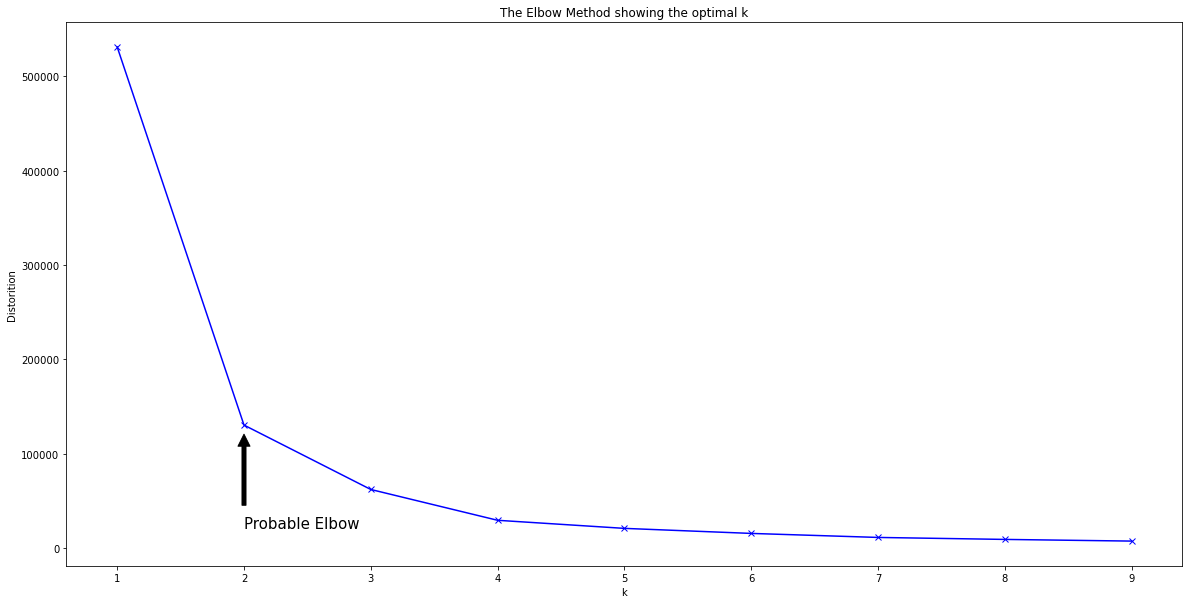

In [68]:
plt.figure(figsize=(20,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorition')
plt.annotate('Probable Elbow',
             xy=(2,distortions[1]),
             xytext=(2,distortions[4]),
             textcoords='data',
             fontsize=15,
             arrowprops=dict(facecolor='black',shrink=0.1))
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=42, algorithm='full',init='k-means++',precompute_distances='auto')
kmeans.fit(x_train,training_scores_encoded)

C:\Users\chowd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


KMeans(algorithm='full', max_iter=100, n_clusters=2, n_init=25,
       precompute_distances='auto', random_state=42)

In [72]:
y_pred = kmeans.predict(x_test)

In [73]:
from sklearn import metrics
print(metrics.classification_report(y_test, (y_pred)))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [75]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
y = (y_data - np.min(y_data)) / (np.max(y_data) - np.min(y_data))

NameError: name 'x_data' is not defined

In [77]:
print('Test accuracy of sklearn KMeans library: {}'.format(model.score(x_test, y_test)))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Sold Price(CR)'],df["IPL"], test_size=0.3, random_state=105)

In [80]:
tree = DecisionTreeClassifier().fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.    0.    0.5   0.    0.    0.    8.5   0.2   0.    2.    0.    0.
  8.25  0.   10.    0.    0.    7.75  1.1   0.    0.    0.    0.    0.2
  0.    3.6   0.    3.4   0.    0.    2.    1.4   0.    7.    0.    0.
  0.3  10.    0.    2.    0.    0.    0.    0.5   4.    0.    0.2   0.
  0.    0.    6.25  0.    0.    0.    2.6   0.    0.    0.    0.    2.6
  0.    0.    0.    0.55  0.3   0.    0.    0.2   0.    0.2   0.    0.55
  0.    0.    2.    0.    0.    0.    0.5   0.    0.    0.    0.    3.8
  0.    0.    0.    1.4   0.    0.    2.    0.    4.    0.    0.    5.25
  0.2   0.    0.    0.2   0.    0.2   0.    0.    0.    0.2   0.    0.65
  0.25  0.    0.    0.    0.    0.    0.    0.3   0.3   0.6   0.    0.2
  0.    0.    0.5   0.    0.   15.25  0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    1.5   0.    0.    0.    0.    8.
  0.    0.    0.    2.6   0.    1.    4.2   0.    4.2   0.   10.    0.
  0.    0.2   0.    0.    0.    0.2   0.    0.    0.    0.5   0.    0.5
  0.19  0.    7.75  0.    0.2   0.    8.25  0.9   0.    8.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.    3.    0.
  0.    0.    0.    0.    0.    0.2   1.    0.    0.    0.    0.5   0.
  0.    0.65  0.5   1.1   0.75  2.4   0.    0.    0.2   0.    0.    0.
  1.5   3.    0.    0.    0.55  0.    0.    1.1   1.3   0.    2.    0.
  0.    0.75  0.2   0.    0.    0.    0.    6.5   0.    0.    0.    0.
  0.    0.    0.    0.    0.2   0.    0.    0.75  0.2   0.    0.    0.
  0.    0.    0.    7.25  0.    0.    0.2   0.    0.    0.    0.    0.2
  0.    0.    0.2   7.75  0.    2.    0.    0.    0.    6.75  0.    0.
  0.    0.    0.2   0.    0.    0.    6.25  0.    0.8   0.2   0.3   0.
  0.2   0.    2.    0.    0.    0.    0.    0.5  14.   10.75  0.    0.
  0.    0.    0.5   2.    0.    0.    0.2   0.    0.    0.    0.    0.
  1.5   6.    0.2   0.    1.2   0.    0.2   0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  2.6   0.    0.    0.   12.25  4.4   0.    0.2   0.    0.2   9.    0.
  0.    1.5   5.75  0.    0.    0.    0.    2.4   0.5   0.    0.    0.75
  0.    0.    0.    0.2   0.    0.2   0.    0.    0.    0.    8.    6.75
  0.    0.2   0.    0.    0.    0.    0.    0.    0.    0.2   0.    0.
  0.    0.    0.    2.4   0.    2.   10.75  0.5   8.25  0.    0.    0.2
  0.    0.    0.   10.75  0.    0.    0.    0.2   0.    0.    7.25  0.
  0.2   0.    1.7   1.6 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
print(tree.score(x_train, y_train))
print(tree.score(x_test, y_test))
print('-'*20)

NameError: name 'tree' is not defined

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Base Price(CR)','Sold Price(CR)']],df["IPL"],test_size=0.3, random_state=42)

In [83]:
from sklearn.svm import SVC
model = SVC()

In [84]:
from sklearn.model_selection import train_test_split
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [85]:
model.score(X_test, y_test)

AttributeError: 'SVC' object has no attribute 'shape_fit_'